# Career Shifterz
Nama :
- Auviera Pascafiwi
- Clara Natalie
- Fahmy Rafian S
- M Fu’ad Saifuddin
- Indra Maulidin
- Luthfan Zulfahmi
- Wenvint

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/Stage 1/Training Data.csv')
df.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Descriptive Statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [11]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [12]:
num = ['Id','Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']
cat = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']

In [13]:
# Describe Data Numerical
df[num].describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [14]:
# Describe Data Categorical
df[cat].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [15]:
df['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

1. Data Terdiri dari __252000 Baris__ dan __13 Kolom__.
2. Untuk Feature __Id__ bisa di Drop saat Analisis lebih lanjut karena sifatnya hanya menunjukkan Identitas dari masing - masing pelanggan. Dan untuk Feature lainnya akan dianalisi lebih lanjut di tahap Analisis selanjutnya.
3. Untuk Feature __Risk_Flag__ dapat dimasukkan ke Tipa Data Kategorik ketika melakukan Analisis lebih lanjut karena meskipun __Datanya berupa Numerik__ tapi berdasarkan Hasil Summary diatas Datanya lebih __bersifat Kategorikal__.
    - Risk_Flag : Hanya terdiri dari 0 (Tidak Gagal Bayar) dan 1 (Gagal Bayar).
4. __Tidak ada__ Feature yaIng memiliki __Nilai Kosong (Null)__.
5. Untuk Data Feature __House Ownership__ untuk status __'norent_noown'__ dapat diklarifikasi lebih lanjut definisinya dan hubungannya dengan __Current House Years__.

# Univariate Analysis

In [16]:
num = ['Income','Age','Experience','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS']

## Data Numerical

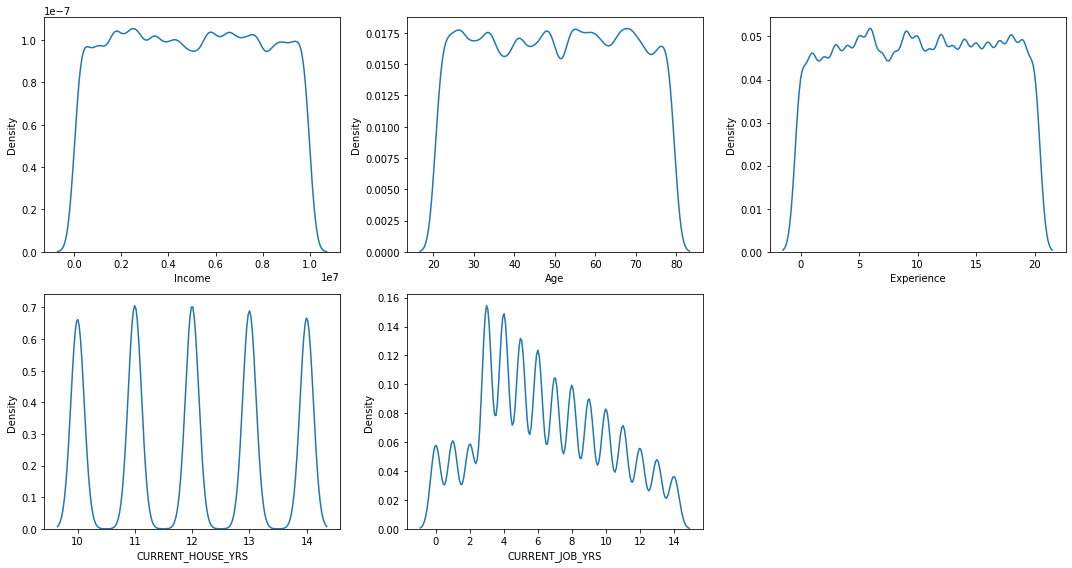

In [17]:
plt.figure(figsize=(15,8))
features = num
for i in range(0,len(features)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

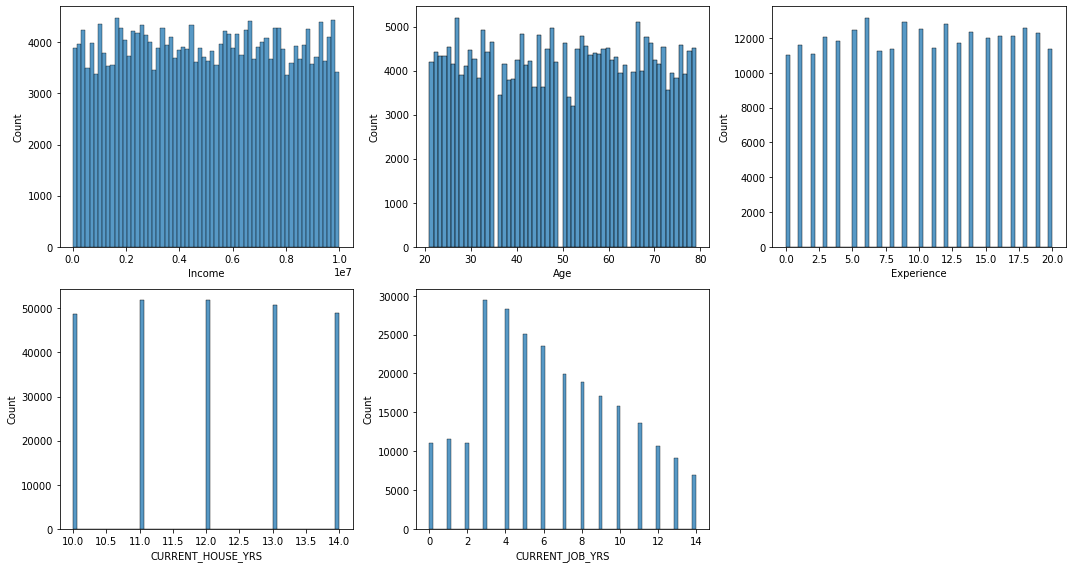

In [18]:
plt.figure(figsize=(15,8))
features = num
for i in range(0,len(features)):
    plt.subplot(2,3,i+1)
    sns.histplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

- Untuk Data Current House Years dan Current Job Years lebih baik divisualisasikan menggunakan Countplot dibandingkan dengan Kde Plot atau Histogram.
- Untuk kedua Data tersebut merupakan Numerik tetapi Diskrit dan Jumlah Nilai Unique masing - masing Feature tidak terlalu banyak untuk divisualisasikan menggunakan Kde atau Histogram Plot.

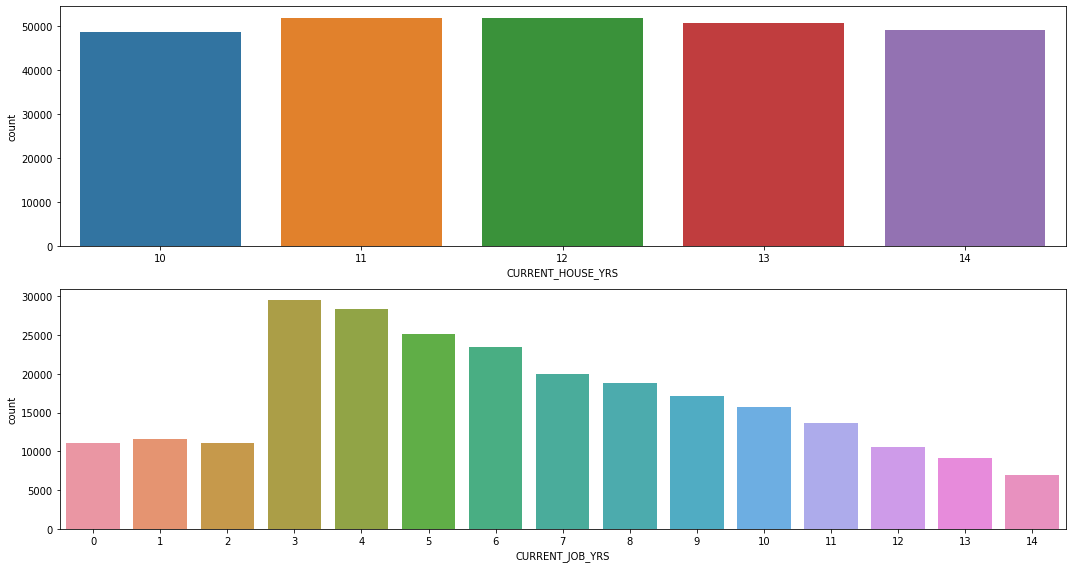

In [19]:
temp = ['CURRENT_HOUSE_YRS','CURRENT_JOB_YRS']

plt.figure(figsize=(15,8))
features = temp
for i in range(0,len(features)):
    plt.subplot(2,1,i+1)
    sns.countplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

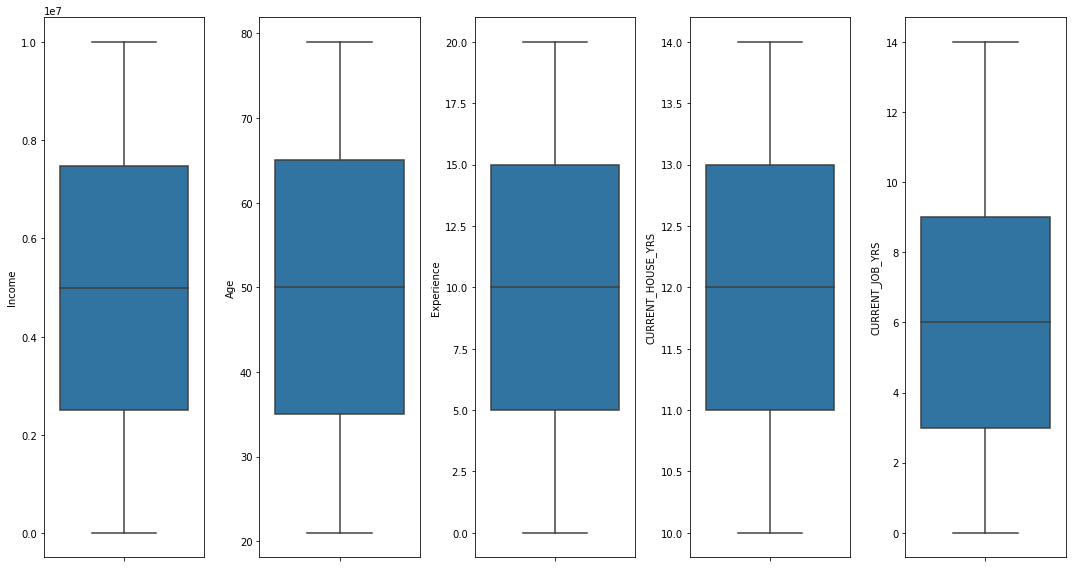

In [20]:
plt.figure(figsize=(15,8))
features = num
for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(y=df[features[i]])
    #plt.xlabel(features[i])
    plt.tight_layout()

## Data Categorical

In [21]:
cat = ['Married/Single','House_Ownership','Car_Ownership','Risk_Flag','Profession','CITY','STATE']

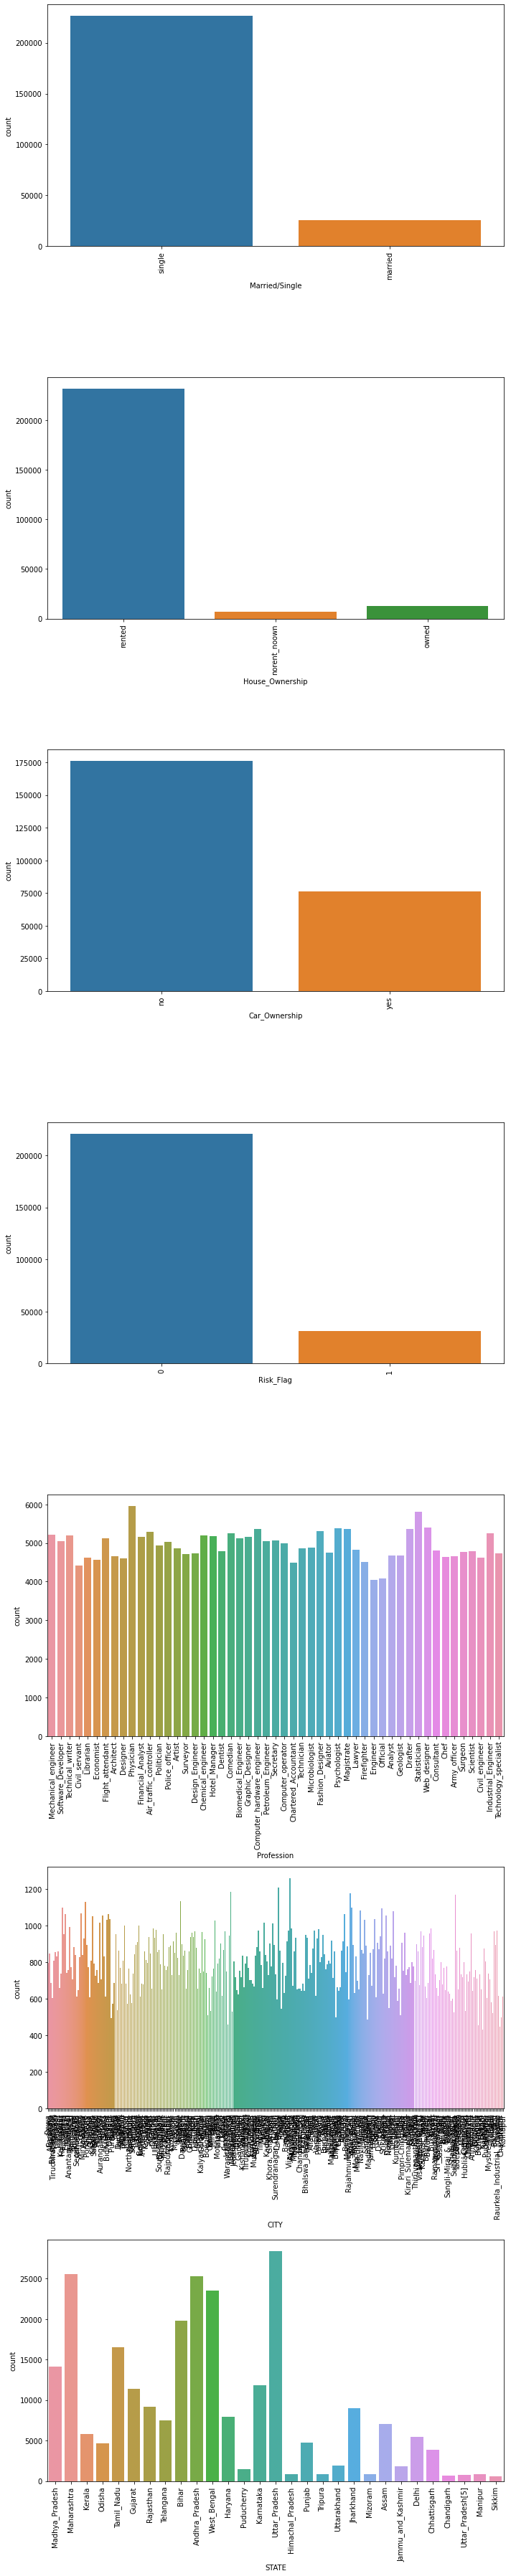

In [22]:
plt.figure(figsize=(10,50))
features = cat
for i in range(0,len(cat)) :
    plt.subplot(len(features),1,i+1)
    sns.countplot(x=df[features[i]],data=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

### Observasi Data

1. Bentuk Distribusi
    - Untuk Data Age, Income, Experince dan Current House Years bentuk distribusinya Uniform.
    - Untuk Data Current Job Years bentuk distribusinya positively skewed (menceng ke kanan).
2. Outlier
    - Tidak ada Outlier pada semua Data Numerical.
3. Nilai yang mendominasi
    - Banyak Data yang Gagal Bayar (Risk_Flag = 1) dibandangkan dengan yang Tidak Gagal Bayar (Risk_Flag = 0).
4. Untuk Data Profession, City dan State memiliki terlalu banyak jumlah kategorinya dimana jumlahnya masing - masing 51, 317 dan 29 kategori secara berurutan.
5. Data Pelanggan didominasi oleh Pelanggan yang statusnya Single, Masih menyewa rumah (Rented) atau Belum memiliki Mobil.

# Multivariate Analysis

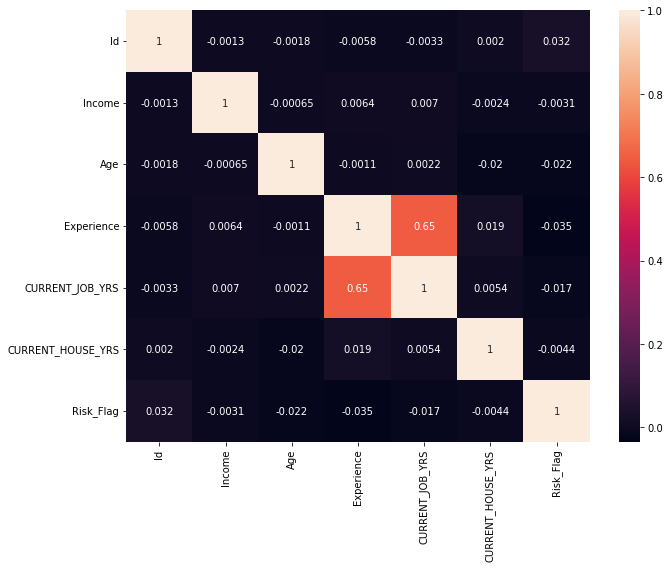

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);
plt.tight_layout()
plt.savefig('HeatMap.png', dpi=200);

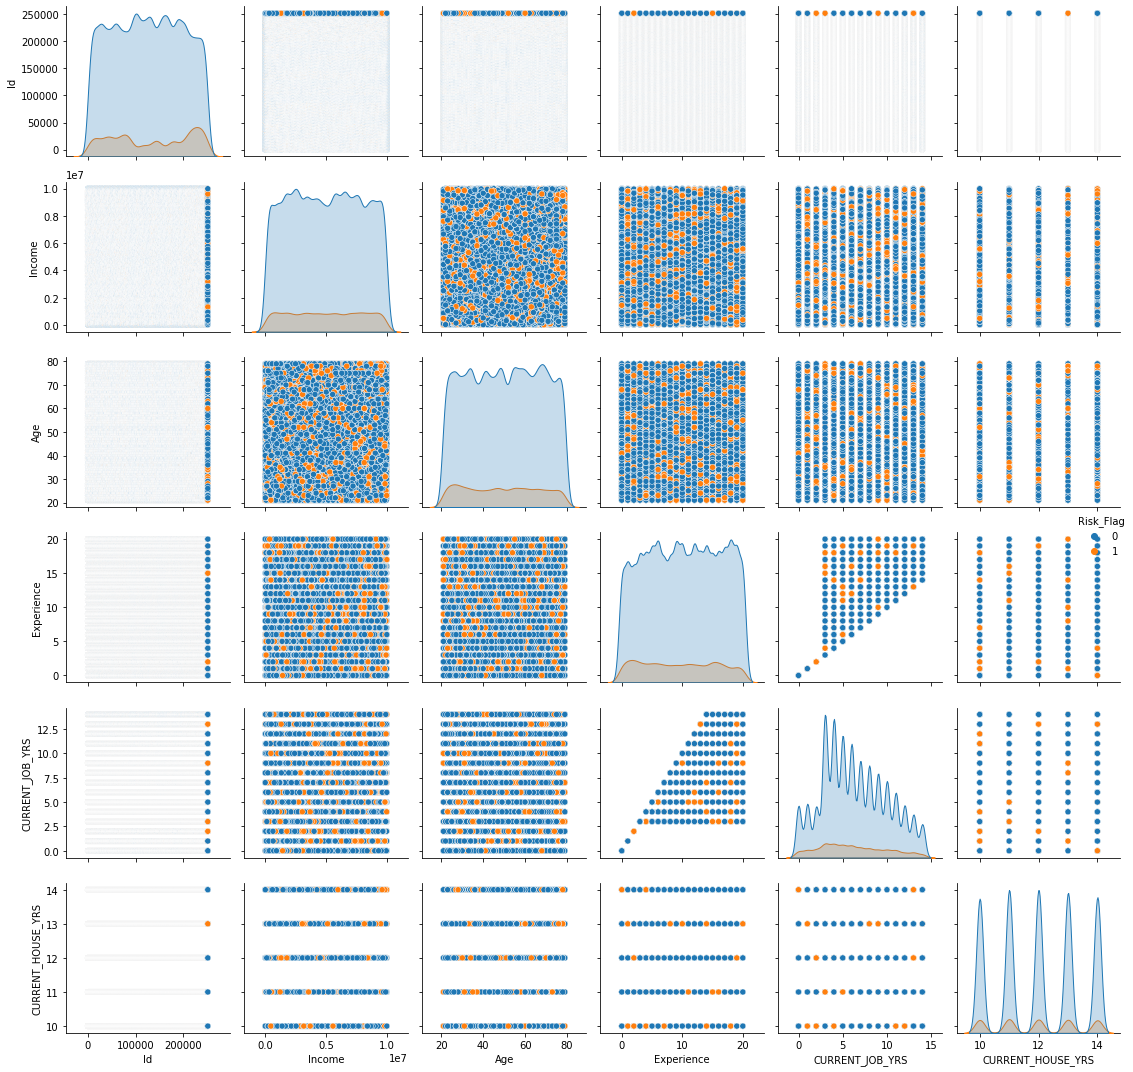

In [ ]:
sns.pairplot(data=df,diag_kind='kde',hue='Risk_Flag')
plt.tight_layout()
plt.savefig('PairPlot.png', dpi=200);

## Marriage Status vs Default Risk

In [ ]:
Marriage_Status = df.groupby(['Married/Single','Risk_Flag'])['Id'].count().reset_index()
Marriage_Status['Risk_Percentage'] = 100*(Marriage_Status['Id']/Marriage_Status.groupby(['Married/Single'])['Id'].transform('sum'))
Marriage_Status

,Married/Single,Risk_Flag,Id,Risk_Percentage
0,married,0,23092,89.754353
1,married,1,2636,10.245647
2,single,0,197912,87.466412
3,single,1,28360,12.533588


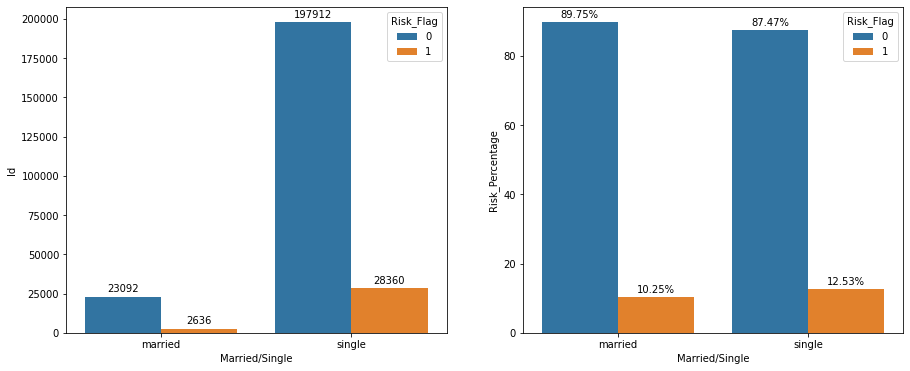

In [ ]:
fig, axes = plt.subplots(1, # number of rows
                     2, # number of columns
                     figsize=(15, 6))
ax = sns.barplot(x='Married/Single', y = 'Id', data=Marriage_Status,ax=axes[0],hue='Risk_Flag')
for p in ax.patches:
  ax.annotate('%.f' % p.get_height(),xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

ax1 = sns.barplot(x='Married/Single',y='Risk_Percentage',data=Marriage_Status,ax=axes[1],hue='Risk_Flag')
for p in ax1.patches:
  ax1.annotate('%.2f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

plt.show()

## House Ownership vs Default Risk

In [ ]:
House_Ownership = df.groupby(['House_Ownership','Risk_Flag'])['Id'].count().reset_index()
House_Ownership['Risk_Percentage'] = 100*(House_Ownership['Id']/House_Ownership.groupby(['House_Ownership'])['Id'].transform('sum'))
House_Ownership

,House_Ownership,Risk_Flag,Id,Risk_Percentage
0,norent_noown,0,6469,90.047327
1,norent_noown,1,715,9.952673
2,owned,0,11758,91.020282
3,owned,1,1160,8.979718
4,rented,0,202777,87.442324
5,rented,1,29121,12.557676


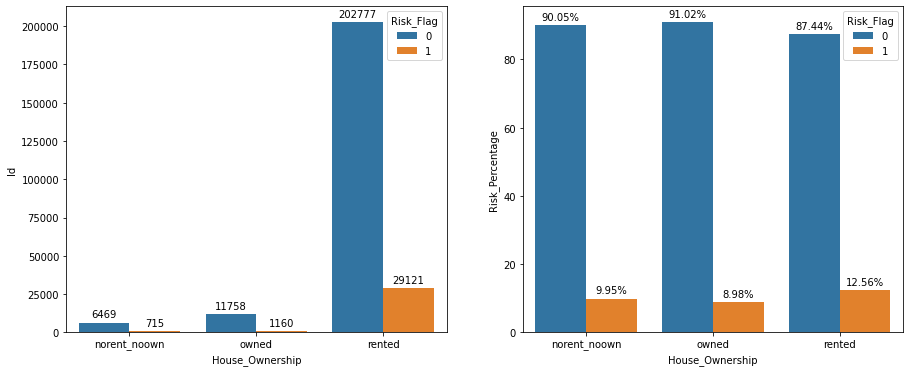

In [ ]:
fig, axes = plt.subplots(1, # number of rows
                     2, # number of columns
                     figsize=(15, 6))
ax = sns.barplot(x='House_Ownership', y = 'Id', data=House_Ownership,ax=axes[0],hue='Risk_Flag')
for p in ax.patches:
  ax.annotate('%.f' % p.get_height(),xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

ax1 = sns.barplot(x='House_Ownership',y='Risk_Percentage',data=House_Ownership,ax=axes[1],hue='Risk_Flag')
for p in ax1.patches:
  ax1.annotate('%.2f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

plt.show()

## Car Ownership vs Default Risk

In [ ]:
Car_Ownership = df.groupby(['Car_Ownership','Risk_Flag'])['Id'].count().reset_index()
Car_Ownership['Risk_Percentage'] = 100*(Car_Ownership['Id']/Car_Ownership.groupby(['Car_Ownership'])['Id'].transform('sum'))
Car_Ownership

,Car_Ownership,Risk_Flag,Id,Risk_Percentage
0,no,0,153439,87.181250
1,no,1,22561,12.818750
2,yes,0,67565,88.901316
3,yes,1,8435,11.098684


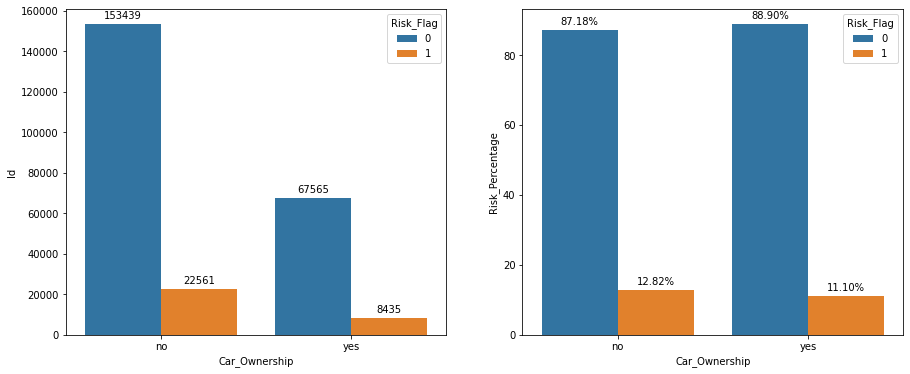

In [ ]:
fig, axes = plt.subplots(1, # number of rows
                     2, # number of columns
                     figsize=(15, 6))
ax = sns.barplot(x='Car_Ownership', y = 'Id', data=Car_Ownership,ax=axes[0],hue='Risk_Flag')
for p in ax.patches:
  ax.annotate('%.f' % p.get_height(),xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

ax1 = sns.barplot(x='Car_Ownership',y='Risk_Percentage',data=Car_Ownership,ax=axes[1],hue='Risk_Flag')
for p in ax1.patches:
  ax1.annotate('%.2f' % p.get_height() + '%' ,xy =(p.get_x() + p.get_width()/2 , p.get_y() + p.get_height()),
              xytext=(0, 5), textcoords='offset points', ha='center')

plt.show()

## Observasi Data

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?
   - Untuk __Feature dan Label tidak berkolerasi__ secara __Linier__ karena Nilai korelasi Linier sangat __Kecil (<0.1)__.
   - Berdasarkan Data pada Heatmap, Feature yang cukup relevan dan mungkin bisa dipertahankan adalah Experience dan Age berdasarkan Nilai Korelasinya terhadap Label (Risk_Flag). Sedangkan untuk Feature lainnya perlu dianalisis lebih lanjut pada Feature Engineering atau saat pengujian Hipotesis.
   - Hubungan Feature Marriage Status, House Ownership dan Car Ownership dengan Label :
       - Marriage Status : Pelanggan dengan Status Single lebih berpotensi Gagal bayar.
       - House Ownership : Pelanggan yang Menyewa Rumah (Rented) lebih berpotensi Gagal bayar.
       - Car Ownership : Pelanggan yang belum memiliki Mobil lebih berpotensi Gagal bayar.
       
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?
   - Untuk masing - masing Feature memiliki korelasi yang kecil antar satu dan lainnya, terkecuali untuk Feature Experience dan Current Job Years yang memiliki korelasi yang cukup Kuat sehingga salah satu Feature ini bisa di drop.
   - Karena salah satu antara Feature Experince dan Current Job Years perlu di drop, maka untuk menentukannya bisa berdasarkan Nilai Korelasinya terhadap Label (Risk_Flag) dimana Feature Experince lebih relevan/memiliki Korelasi lebih tinggi dengan Label dibandingkan dengan Feature Current Job Years.

# Business Insight

1. Berdasarkan Hasil analisis untuk Feature Single/Married, House_Ownership dan Car_Ownership tidak ada Perbedaan yang cukup signifikan antara Pelanggan dari Feature tersebut sehingga Tim Bisnis dapat menargetkan seluruh Segmen Pelanggan dari ketiga Feature tersebut.
2. Namun bila Tim Bisnis tetap ingin memilih maka Tim Bisnis dapat menargetkan Pelanggan yang memiliki status Married, Memiliki Rumah atau Memiliki Mobil karena ketiga Segmen tersebut memiliki persentase Peluang Gagal Bayar yang rendah. Dengan menargetkan pelanggan ini, Tim Bisnis juga dapat meningkatkan Jumlah Pelanggan untuk ketiga Segmen tersebut karena Jumlah Pelanggannya masih sedikit sehingga dapat meningkatkan Jumlah Pelanggan yang tidak berpotensi Gagal Bayar.
3. Tim Marketing dapat melakukan Campaign untuk Segmen Pelanggan dengan Status Married, Memiliki Rumah atau Memiliki Mobil.